# Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
COVIDAGI = pd.read_csv('COVIDAGI.csv',index_col = 0)
COVIDAGI.head()

,State,cases,deaths,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent
0,Alabama,387786,14345,119662909,18553159,35924229,49537638,76667112,101687773,114405941
1,Alaska,18316,367,23969001,2848087,6184956,8915998,14554105,20064361,22927860
2,Arizona,426614,18857,197753744,33609317,63073164,85351788,128616004,168531690,189378565
3,Arkansas,161569,3301,74634888,16319991,26475276,34256878,49689104,64088761,71584342
4,California,2664110,102387,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869


In [3]:
COVIDAGI = COVIDAGI.drop(columns=['cases', 'deaths'])
COVIDAGI.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869


In [4]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [5]:
COVIDAGI = pd.merge(COVIDAGI, COVID, how = 'left', on = 'State')
COVIDAGI.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,159098,5202


In [6]:
COVIDAGI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 10 columns):
State                 51 non-null object
AGI Total             51 non-null int64
AGI Top 1 Percent     51 non-null int64
AGI Top 5 Percent     51 non-null int64
AGI Top 10 Percent    51 non-null int64
AGI Top 25 Percent    51 non-null int64
AGI Top 50 Percent    51 non-null int64
AGI Top 75 Percent    51 non-null int64
cases                 51 non-null int64
deaths                51 non-null int64
dtypes: int64(9), object(1)
memory usage: 4.4+ KB


In [7]:
COVIDAGI.isnull().sum()

State                 0
AGI Total             0
AGI Top 1 Percent     0
AGI Top 5 Percent     0
AGI Top 10 Percent    0
AGI Top 25 Percent    0
AGI Top 50 Percent    0
AGI Top 75 Percent    0
cases                 0
deaths                0
dtype: int64

In [8]:
COVIDAGI.describe()

,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,cases,deaths
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,2.173379e+08,4.397083e+07,7.653212e+07,1.002433e+08,1.457253e+08,1.877254e+08,2.091911e+08,41994.235294,2290.549020
std,2.771243e+08,6.822804e+07,1.107285e+08,1.404116e+08,1.951457e+08,2.436947e+08,2.679196e+08,63513.183767,4748.588326
min,2.048172e+07,2.848087e+06,5.883104e+06,8.166850e+06,1.278072e+07,1.723822e+07,1.963047e+07,614.000000,10.000000
25%,4.810599e+07,7.242758e+06,1.398235e+07,1.946382e+07,3.039541e+07,4.071721e+07,4.609241e+07,9231.500000,212.000000
50%,1.196629e+08,2.054118e+07,3.733305e+07,4.986673e+07,7.666711e+07,1.016878e+08,1.144059e+08,20152.000000,704.000000
75%,2.944865e+08,4.816363e+07,9.222678e+07,1.256728e+08,1.912240e+08,2.516520e+08,2.825032e+08,46961.500000,2469.500000
max,1.549285e+09,3.562404e+08,6.008595e+08,7.727388e+08,1.086300e+09,1.360948e+09,1.497301e+09,389349.000000,30683.000000


In [9]:
corr = COVIDAGI.corr()
corr

,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,cases,deaths
AGI Total,1.000000,0.982446,0.993602,0.996809,0.999215,0.999895,0.999992,0.728906,0.534352
AGI Top 1 Percent,0.982446,1.000000,0.997090,0.993901,0.988657,0.984805,0.983069,0.766631,0.592474
AGI Top 5 Percent,0.993602,0.997090,1.000000,0.999411,0.997181,0.995043,0.993986,0.751468,0.567522
AGI Top 10 Percent,0.996809,0.993901,0.999411,1.000000,0.999158,0.997820,0.997082,0.743747,0.555784
AGI Top 25 Percent,0.999215,0.988657,0.997181,0.999158,1.000000,0.999676,0.999349,0.735542,0.543648
AGI Top 50 Percent,0.999895,0.984805,0.995043,0.997820,0.999676,1.000000,0.999942,0.732172,0.538727
AGI Top 75 Percent,0.999992,0.983069,0.993986,0.997082,0.999349,0.999942,1.000000,0.730278,0.536180
cases,0.728906,0.766631,0.751468,0.743747,0.735542,0.732172,0.730278,1.000000,0.957358
deaths,0.534352,0.592474,0.567522,0.555784,0.543648,0.538727,0.536180,0.957358,1.000000


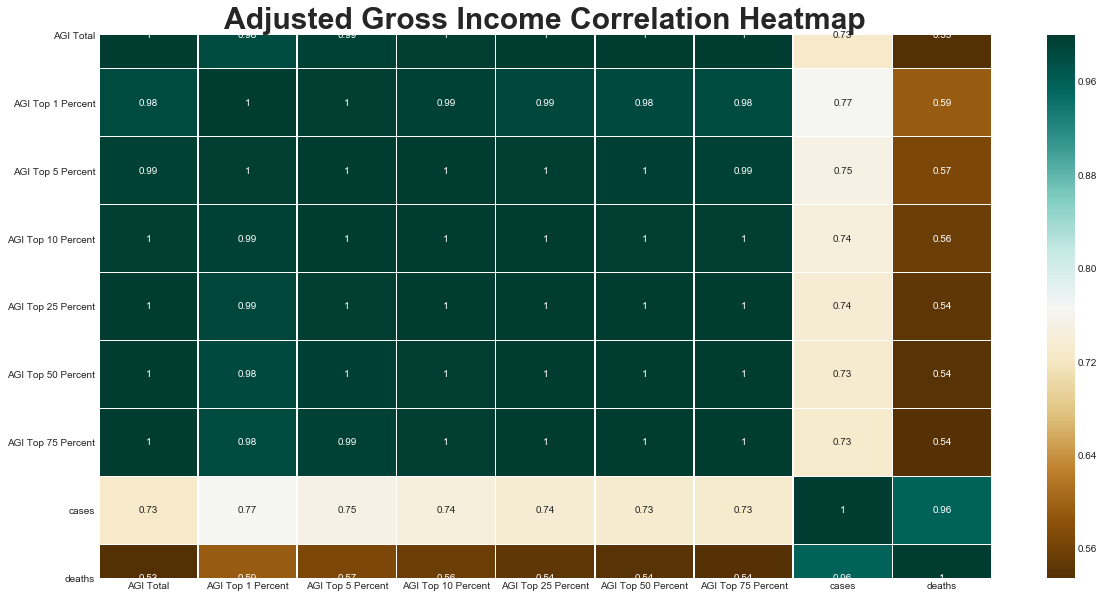

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Adjusted Gross Income Correlation Heatmap', fontweight = 'bold', fontsize = 30);

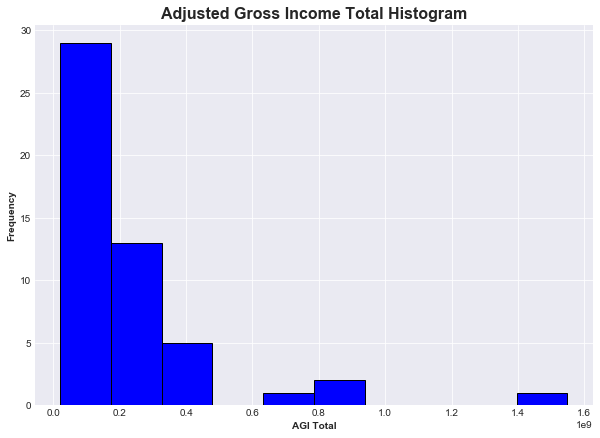

In [11]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Total'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Total Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Total', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

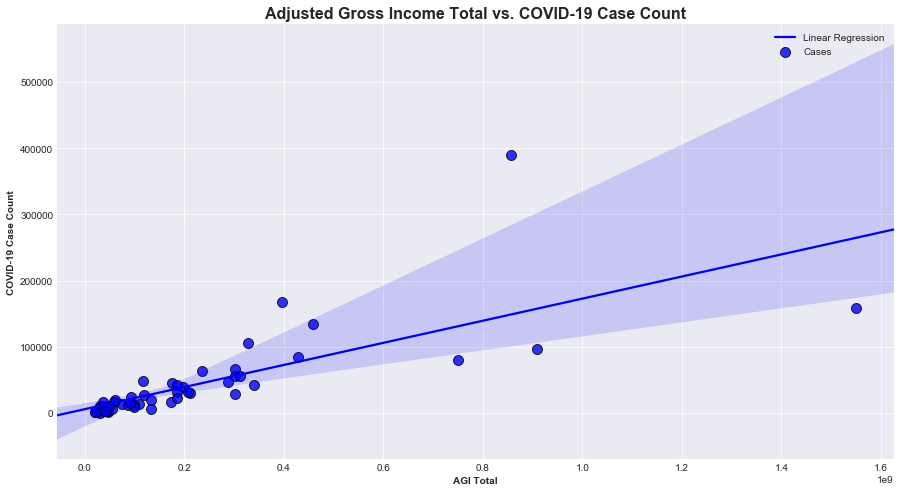

In [12]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Total', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Total vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Total', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [13]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Total'])

SpearmanrResult(correlation=0.919185520361991, pvalue=1.8177060005140226e-21)

In [14]:
model1 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Total']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              102.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    1.04e-13
Time:                        07:48:49   Log-Likelihood:                         -616.82
No. Observations:                  51   AIC:                                      1236.
Df Residuals:                      50   BIC:                                      1238.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGI Total      0.0002   1.75e-05     10.130      0.000       0.000       0.000
==============================================================================
Omnibus:                       60.410   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.886
Skew:                           2.849   Prob(JB):                    1.22e-131
Kurtosis:                      18.851   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

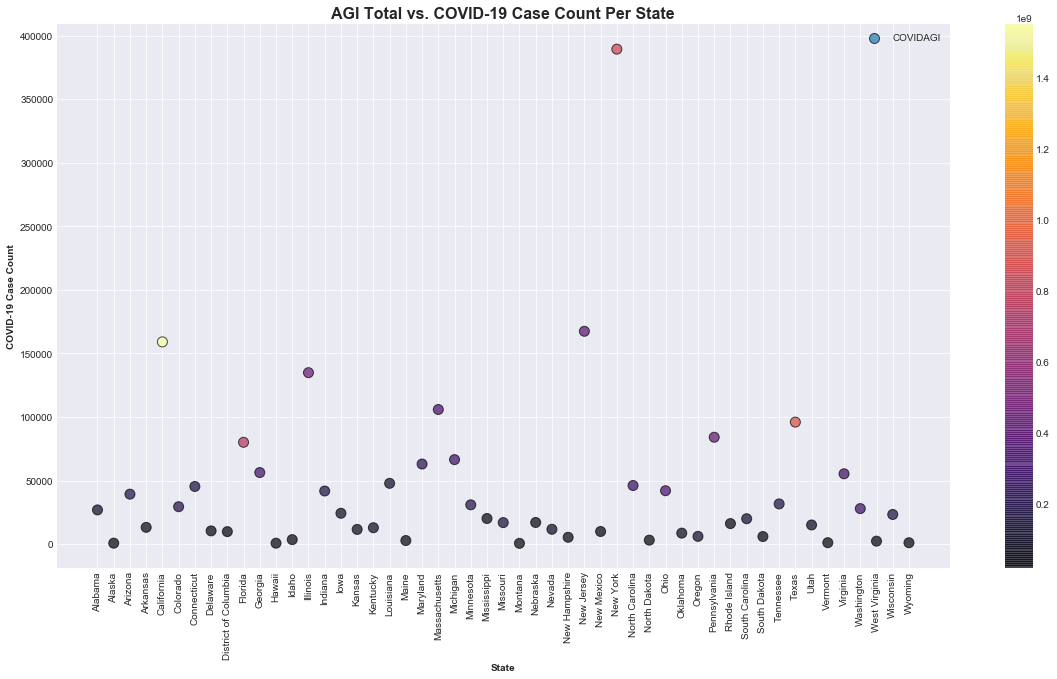

In [15]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Total'], cmap = 'inferno')
plt.title('AGI Total vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['COVIDAGI'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

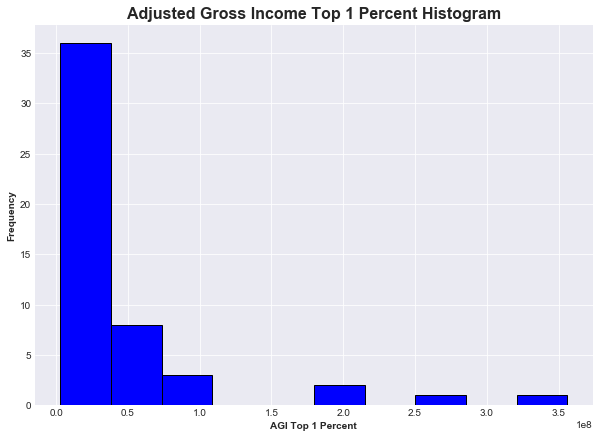

In [16]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 1 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 1 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 1 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

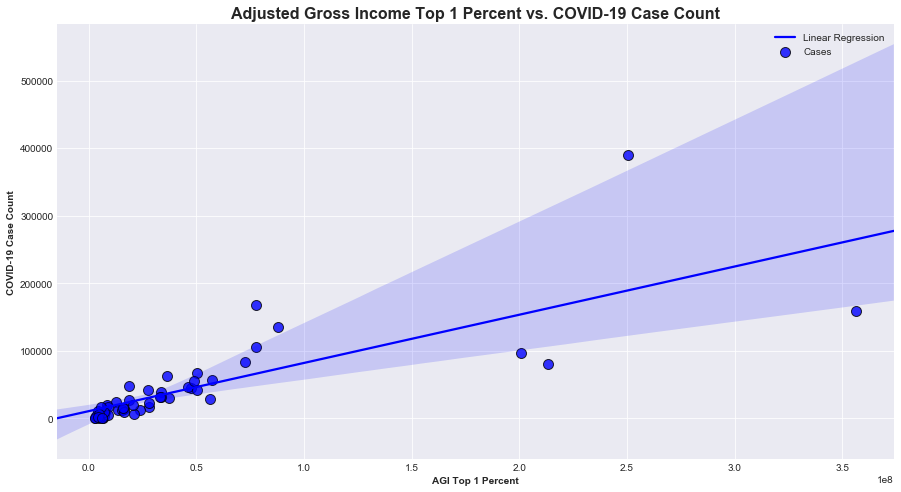

In [17]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 1 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 1 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 1 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [19]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 1 Percent'])

SpearmanrResult(correlation=0.9113122171945701, pvalue=1.6163132105347078e-20)

In [20]:
model2 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 1 Percent']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.701
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              117.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    1.03e-14
Time:                        00:13:01   Log-Likelihood:                         -614.48
No. Observations:                  51   AIC:                                      1231.
Df Residuals:                      50   BIC:                                      1233.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
AGI Top 1 Percent     0.0008   7.25e-05     10.828      0.000       0.001       0.001
==============================================================================
Omnibus:                       31.683   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.342
Skew:                           1.253   Prob(JB):                     2.54e-40
Kurtosis:                      11.918   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

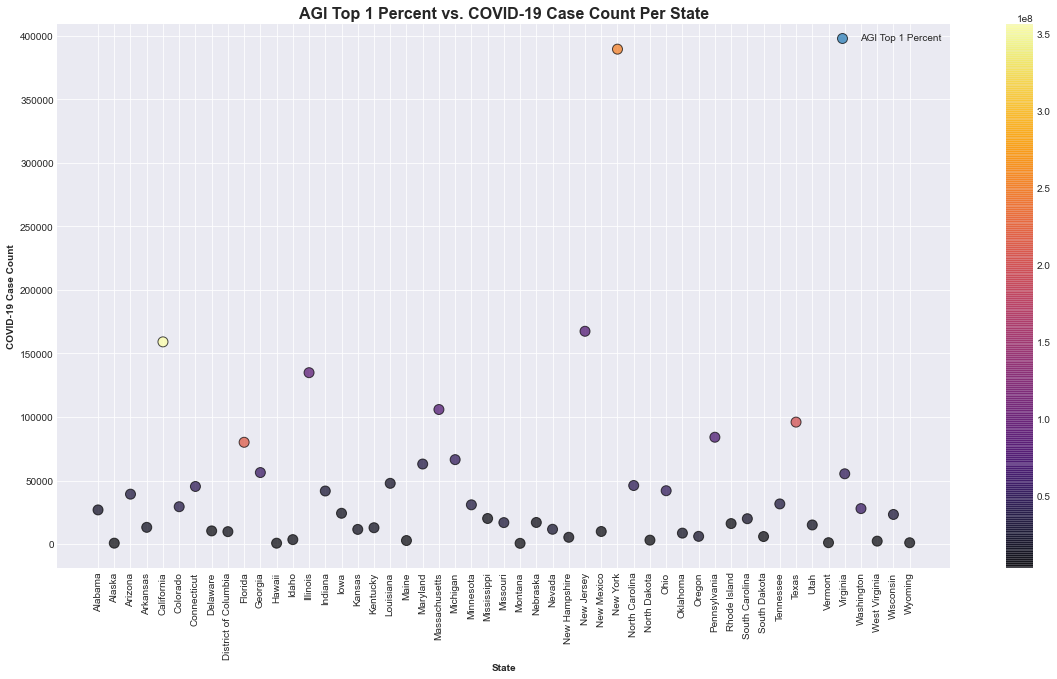

In [21]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 1 Percent'], cmap = 'inferno')
plt.title('AGI Top 1 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 1 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

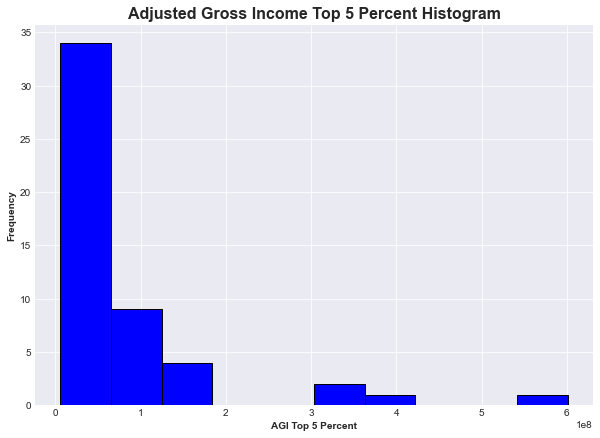

In [22]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 5 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 5 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 5 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

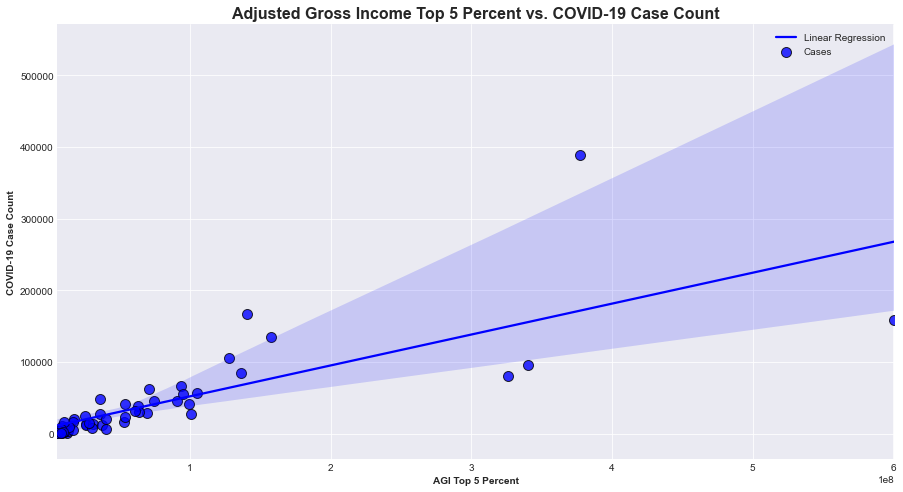

In [23]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 5 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 5 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 5 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [24]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 5 Percent'])

SpearmanrResult(correlation=0.9195475113122171, pvalue=1.6353080692105181e-21)

In [25]:
model3 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 5 Percent']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              111.0
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    2.70e-14
Time:                        00:13:02   Log-Likelihood:                         -615.46
No. Observations:                  51   AIC:                                      1233.
Df Residuals:                      50   BIC:                                      1235.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
AGI Top 5 Percent     0.0005   4.46e-05     10.535      0.000       0.000       0.001
==============================================================================
Omnibus:                       43.358   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.690
Skew:                           1.859   Prob(JB):                     1.26e-68
Kurtosis:                      14.546   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

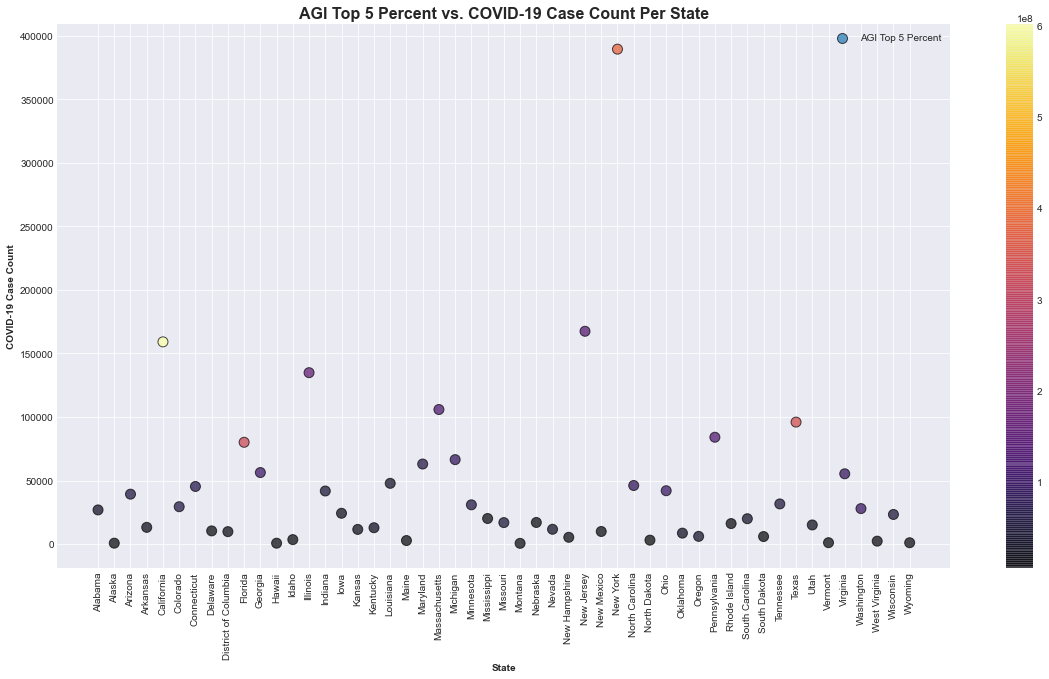

In [26]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 5 Percent'], cmap = 'inferno')
plt.title('AGI Top 5 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 5 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

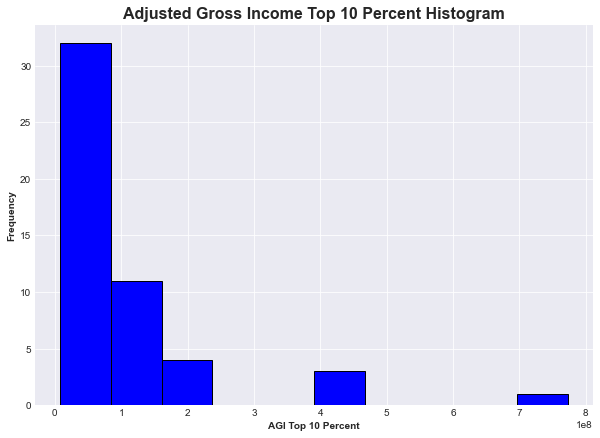

In [27]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 10 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 10 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 10 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

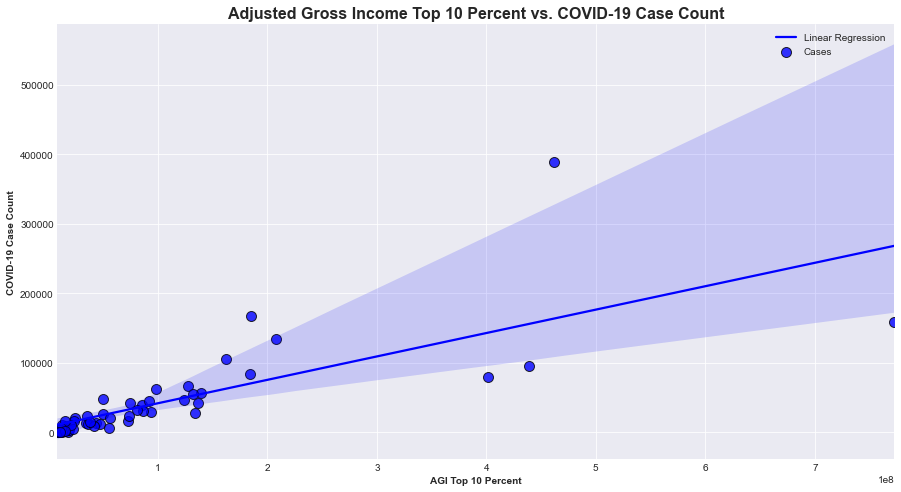

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 10 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 10 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 10 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 10 Percent'])

SpearmanrResult(correlation=0.9247963800904976, pvalue=3.329867470173157e-22)

In [30]:
model4 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 10 Percent']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              107.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    4.49e-14
Time:                        00:13:03   Log-Likelihood:                         -615.97
No. Observations:                  51   AIC:                                      1234.
Df Residuals:                      50   BIC:                                      1236.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AGI Top 10 Percent     0.0004   3.51e-05     10.381      0.000       0.000       0.000
==============================================================================
Omnibus:                       48.637   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.184
Skew:                           2.148   Prob(JB):                     3.09e-85
Kurtosis:                      15.833   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

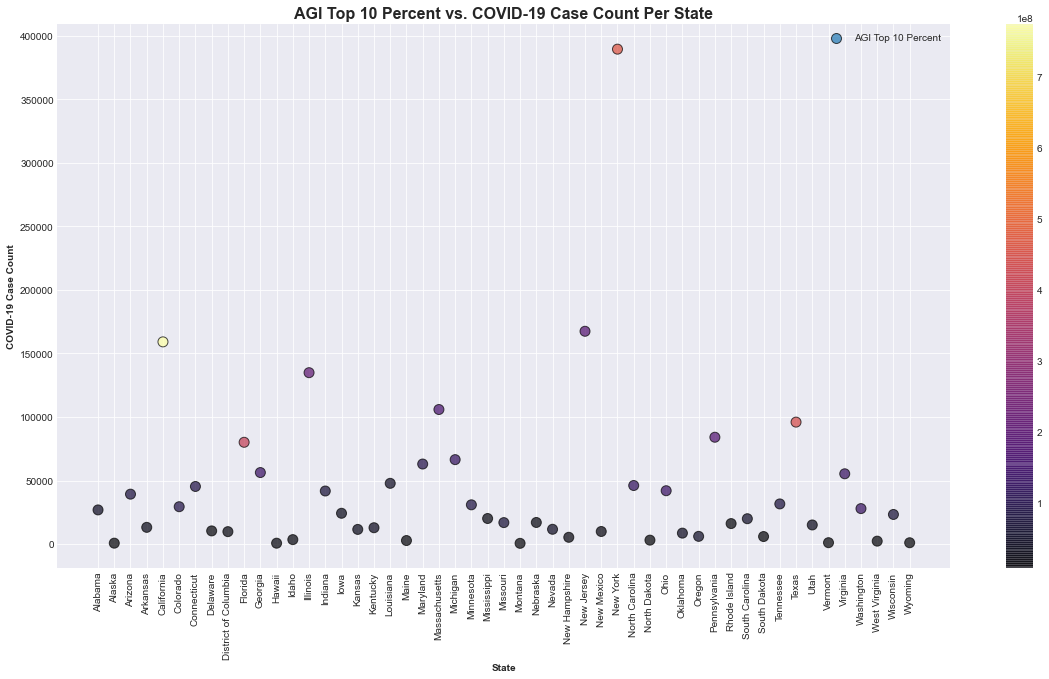

In [31]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 10 Percent'], cmap = 'inferno')
plt.title('AGI Top 10 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 10 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

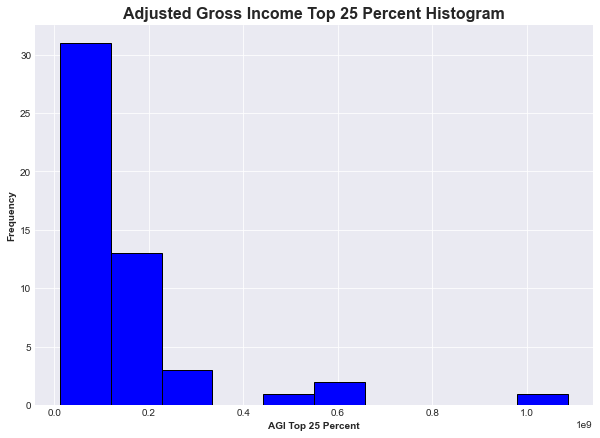

In [32]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 25 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 25 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 25 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

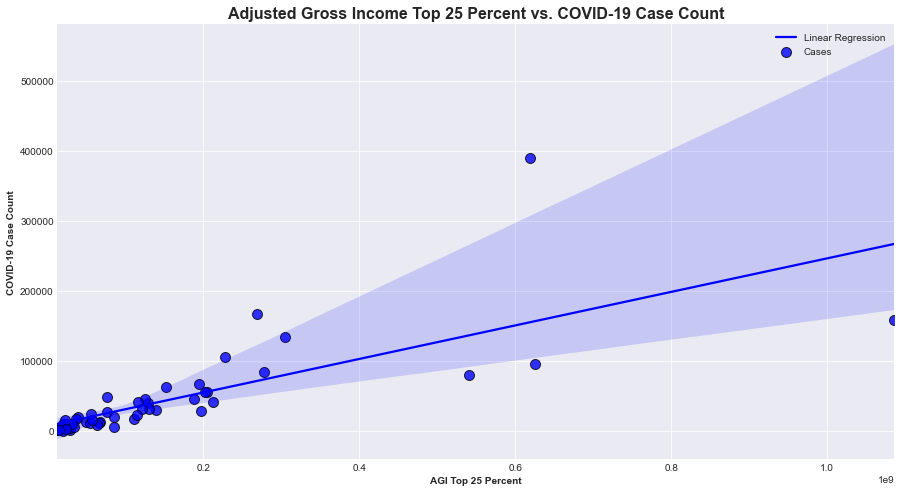

In [33]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 25 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 25 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 25 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [34]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 25 Percent'])

SpearmanrResult(correlation=0.9219004524886878, pvalue=8.123555279502277e-22)

In [35]:
model5 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 25 Percent']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              104.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    7.30e-14
Time:                        00:13:04   Log-Likelihood:                         -616.46
No. Observations:                  51   AIC:                                      1235.
Df Residuals:                      50   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AGI Top 25 Percent     0.0003   2.51e-05     10.236      0.000       0.000       0.000
==============================================================================
Omnibus:                       54.851   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.670
Skew:                           2.506   Prob(JB):                    3.83e-108
Kurtosis:                      17.411   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

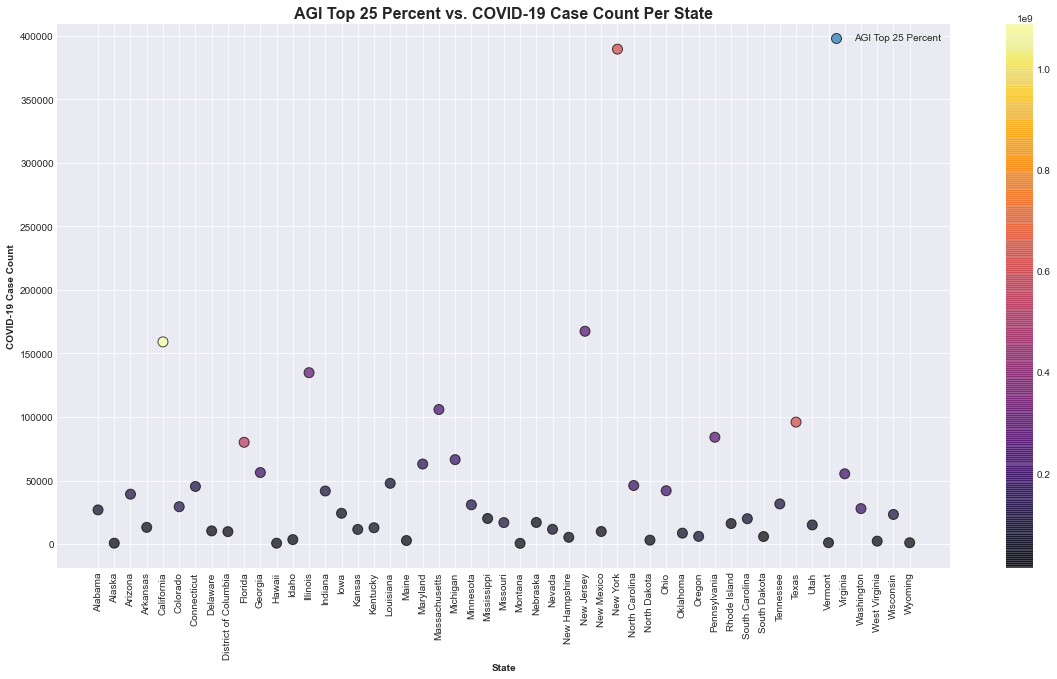

In [36]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 25 Percent'], cmap = 'inferno')
plt.title('AGI Top 25 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 25 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

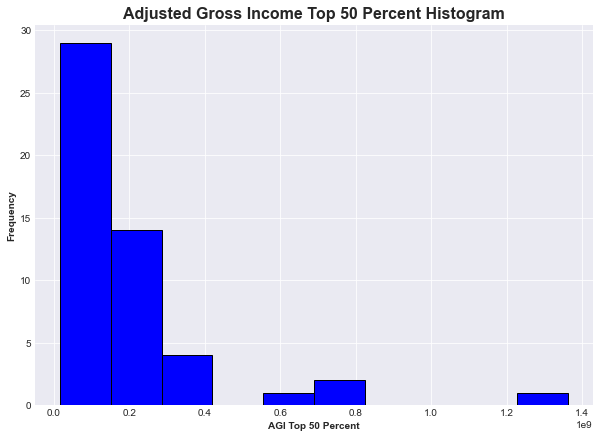

In [37]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 50 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 50 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 50 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

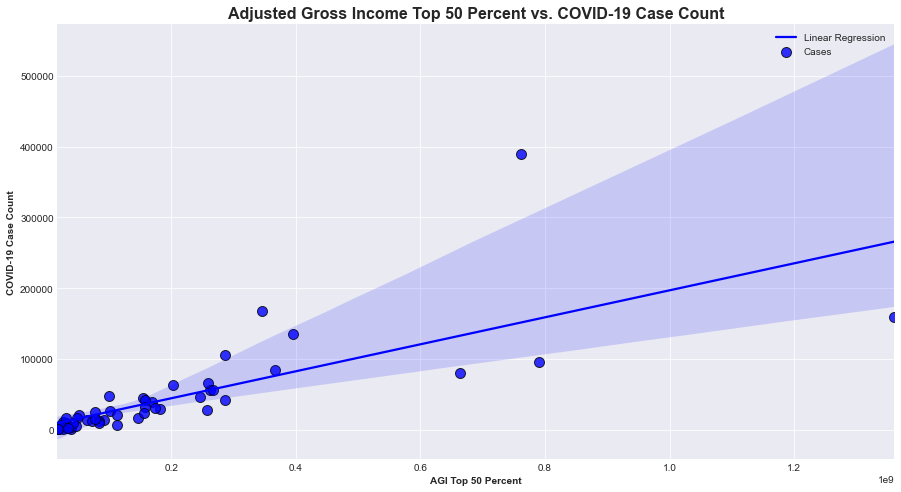

In [38]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 50 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 50 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 50 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [39]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 50 Percent'])

SpearmanrResult(correlation=0.9209954751131221, pvalue=1.065924299174552e-21)

In [40]:
model6 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 50 Percent']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              103.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    8.49e-14
Time:                        00:13:05   Log-Likelihood:                         -616.61
No. Observations:                  51   AIC:                                      1235.
Df Residuals:                      50   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AGI Top 50 Percent     0.0002   1.99e-05     10.190      0.000       0.000       0.000
==============================================================================
Omnibus:                       58.397   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.955
Skew:                           2.721   Prob(JB):                    5.70e-123
Kurtosis:                      18.339   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

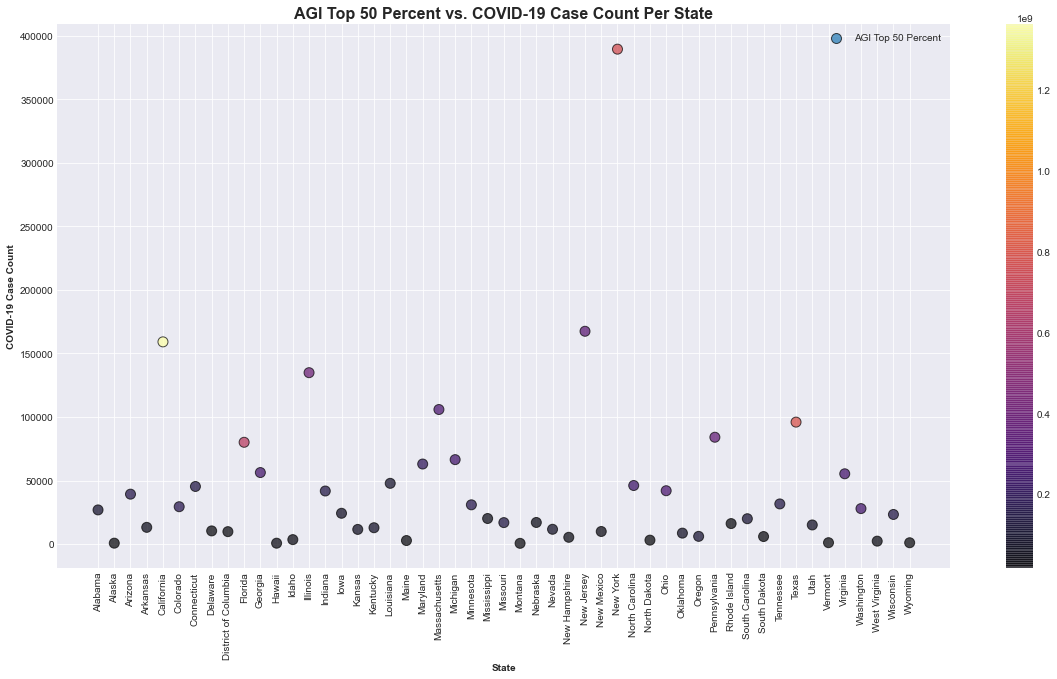

In [41]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 50 Percent'], cmap = 'inferno')
plt.title('AGI Top 50 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 50 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

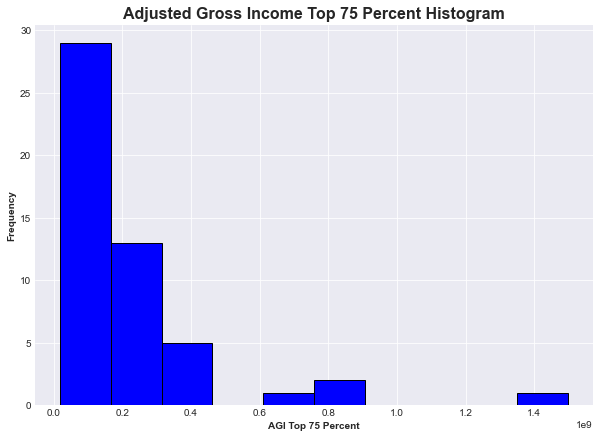

In [42]:
plt.style.use('seaborn-darkgrid')

COVIDAGI['AGI Top 75 Percent'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Adjusted Gross Income Top 75 Percent Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 75 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

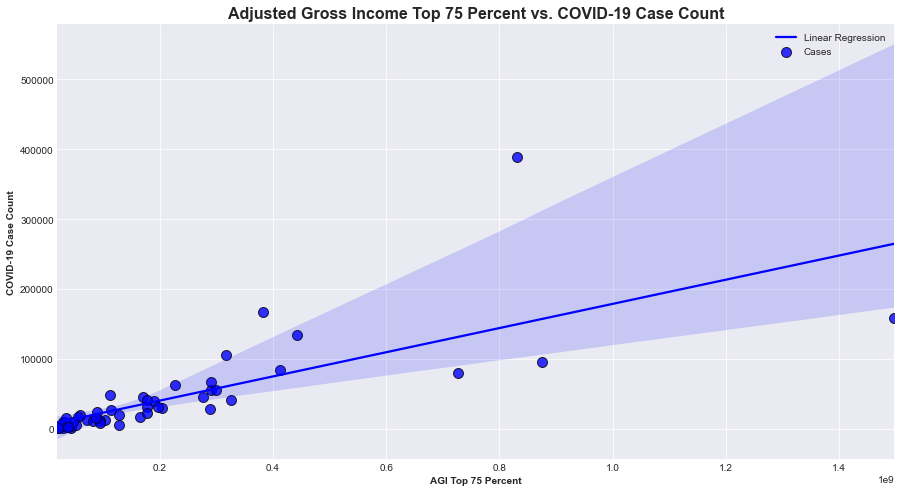

In [43]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'AGI Top 75 Percent', y = 'cases', data = COVIDAGI, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Adjusted Gross Income Top 75 Percent vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('AGI Top 75 Percent', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [44]:
spearmanr(COVIDAGI['cases'], COVIDAGI['AGI Top 75 Percent'])

SpearmanrResult(correlation=0.919185520361991, pvalue=1.8177060005140226e-21)

In [45]:
model7 = sm.OLS(COVIDAGI['cases'], COVIDAGI['AGI Top 75 Percent']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              103.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    9.44e-14
Time:                        00:13:05   Log-Likelihood:                         -616.72
No. Observations:                  51   AIC:                                      1235.
Df Residuals:                      50   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AGI Top 75 Percent     0.0002   1.81e-05     10.159      0.000       0.000       0.000
==============================================================================
Omnibus:                       59.868   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.272
Skew:                           2.814   Prob(JB):                    2.45e-129
Kurtosis:                      18.718   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

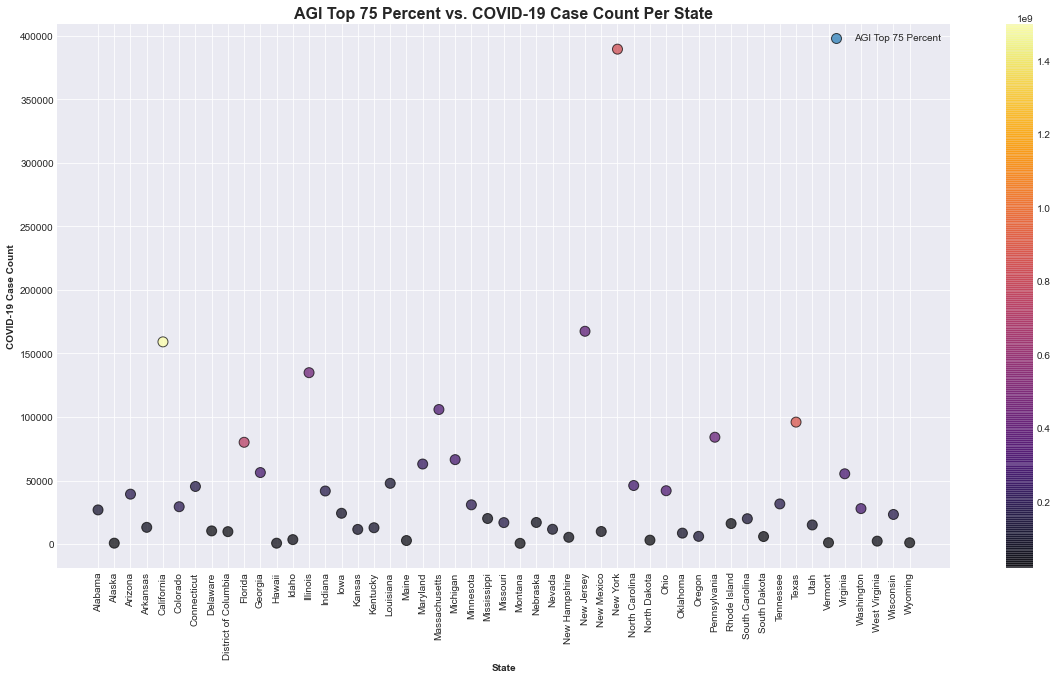

In [46]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDAGI['State'] 
y = COVIDAGI['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDAGI['AGI Top 75 Percent'], cmap = 'inferno')
plt.title('AGI Top 75 Percent vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['AGI Top 75 Percent'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [48]:
model8 = sm.OLS(COVIDAGI['cases'], COVIDAGI[['AGI Top 1 Percent', 'AGI Top 5 Percent', 'AGI Top 10 Percent',
                                            'AGI Top 25 Percent', 'AGI Top 50 Percent', 'AGI Top 75 Percent']]).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              77.79
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                    4.23e-22
Time:                        00:13:15   Log-Likelihood:                         -583.28
No. Observations:                  51   AIC:                                      1179.
Df Residuals:                      45   BIC:                                      1190.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
AGI Top 1 Percent     -0.0131      0.009     -1.472      0.148      -0.031       0.005
AGI Top 5 Percent      0.0499      0.031      1.621      0.112      -0.012       0.112
AGI Top 10 Percent    -0.0279      0.036     -0.782      0.438      -0.100       0.044
AGI Top 25 Percent    -0.0551      0.019     -2.872      0.006      -0.094      -0.016
AGI Top 50 Percent     0.0992      0.013      7.847      0.000       0.074       0.125
AGI Top 75 Percent    -0.0526      0.007     -7.501      0.000      -0.067      -0.038
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.341
Skew:                           0.030   Prob(JB):                        0.843
Kurtosis:                       3.396   Cond. No.                     8.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""